## Importation des paquets requis

In [3]:
import sys
sys.path.append('/opt/ros/noetic/lib/python3/dist-packages/')
sys.path.append('/usr/lib/python3/dist-packages')
import numpy as np
from lab_utils.plan_utils import *
from matplotlib import pyplot as plt
from matplotlib import image as mpimg
import cv2

## Importation de la carte (format png)

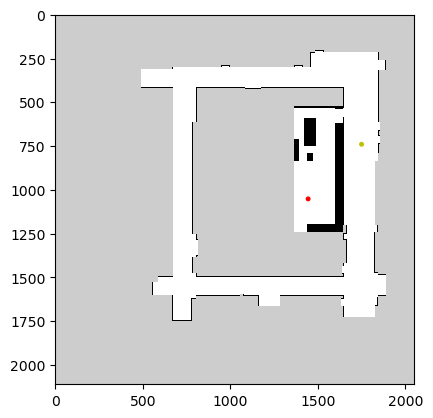

In [4]:
fig, ax = plt.subplots()
image = mpimg.imread("Maps/a2230_map_closed.png")
start = Point(1444.7, 1052.1)
end = Point(1750, 740)

plt.imshow(image)
ax.add_artist(plt.Circle((start.x, start.y), 10, color='r'))
ax.add_artist(plt.Circle((end.x, end.y), 10, color='y'))
plt.show()

In [5]:
map_img = 1-np.array(image[:,:,1])
print(map_img.shape)
mat_map = map_img
map = BMPMap(width=map_img.shape[1], height=map_img.shape[0], mat=mat_map)

(2112, 2048)


## Trajectoire avec A*

In [6]:
from lab_utils.astart import AStarPlanner
astarPlanner = AStarPlanner(map=map, step_size=10, collision_radius=12, heuristic_dist='Euclidean')
astarPlanner.plan(start=start, target=end)

Done !


(1444.7, 1052.1)
(1454.7, 1042.1)
(1464.7, 1032.1)
(1474.7, 1022.0999999999999)
(1484.7, 1012.0999999999999)
(1494.7, 1002.0999999999999)
(1504.7, 992.0999999999999)
(1514.7, 982.0999999999999)
(1524.7, 972.0999999999999)
(1534.7, 962.0999999999999)
(1544.7, 952.0999999999999)
(1554.7, 942.0999999999999)
(1564.7, 932.0999999999999)
(1574.7, 922.0999999999999)
(1584.7, 912.0999999999999)
(1584.7, 902.0999999999999)
(1584.7, 892.0999999999999)
(1584.7, 882.0999999999999)
(1584.7, 872.0999999999999)
(1584.7, 862.0999999999999)
(1584.7, 852.0999999999999)
(1584.7, 842.0999999999999)
(1584.7, 832.0999999999999)
(1584.7, 822.0999999999999)
(1584.7, 812.0999999999999)
(1584.7, 802.0999999999999)
(1584.7, 792.0999999999999)
(1584.7, 782.0999999999999)
(1584.7, 772.0999999999999)
(1584.7, 762.0999999999999)
(1584.7, 752.0999999999999)
(1584.7, 742.0999999999999)
(1584.7, 732.0999999999999)
(1584.7, 722.0999999999999)
(1584.7, 712.0999999999999)
(1584.7, 702.0999999999999)
(1584.7, 692.099999999

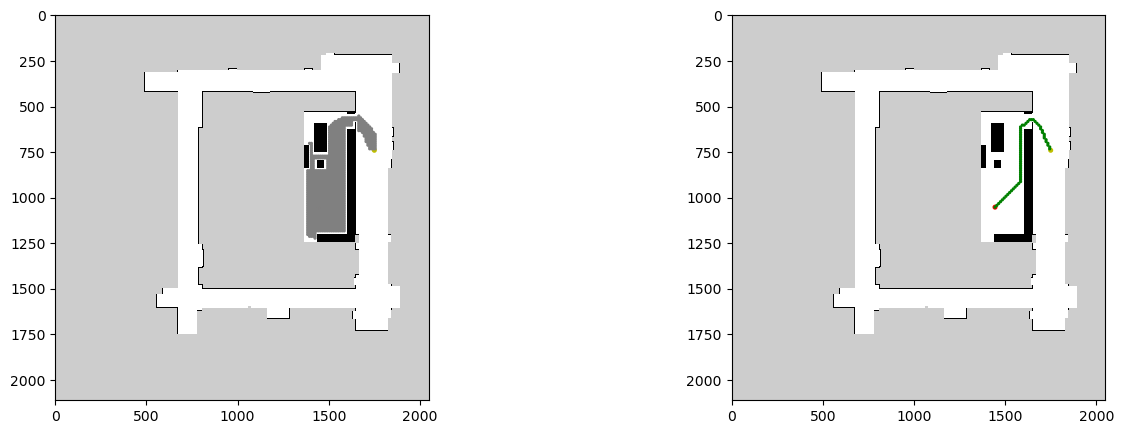

In [7]:
fig = plt.figure(figsize=(16,5))
ax = fig.add_subplot(1, 2, 1)
plt.imshow(image)
ax.add_artist(plt.Circle((start.x, start.y), 10, color='r'))
ax.add_artist(plt.Circle((end.x, end.y), 10, color='y'))
for i in range(len(astarPlanner.open_list)-1):
    pt = astarPlanner.open_list[i].pos.tuple()
    ax.add_artist(plt.Circle((pt[0], pt[1]), 5, color='gray'))
for i in range(len(astarPlanner.close_list)-1):
    pt = astarPlanner.close_list[i].pos.tuple()
    ax.add_artist(plt.Circle((pt[0], pt[1]), 5, color='gray'))

ax2 = fig.add_subplot(1, 2, 2)
plt.imshow(image)
ax2.add_artist(plt.Circle((start.x, start.y), 10, color='r'))
ax2.add_artist(plt.Circle((end.x, end.y), 10, color='y'))
for i in range(len(astarPlanner.finalPath)-1):
    pt = astarPlanner.finalPath[i].tuple()
    print(pt)
    ax2.add_artist(plt.Circle((pt[0], pt[1]), 5, color='g'))
plt.show()

## Trajectoire avec RRT

In [8]:
from lab_utils.rrt import RRTPlanner
rrtPlanner = RRTPlanner(map, epsilon=0.05, stepSize=5)
rrtPlanner.plan(start=start, target=end)

final


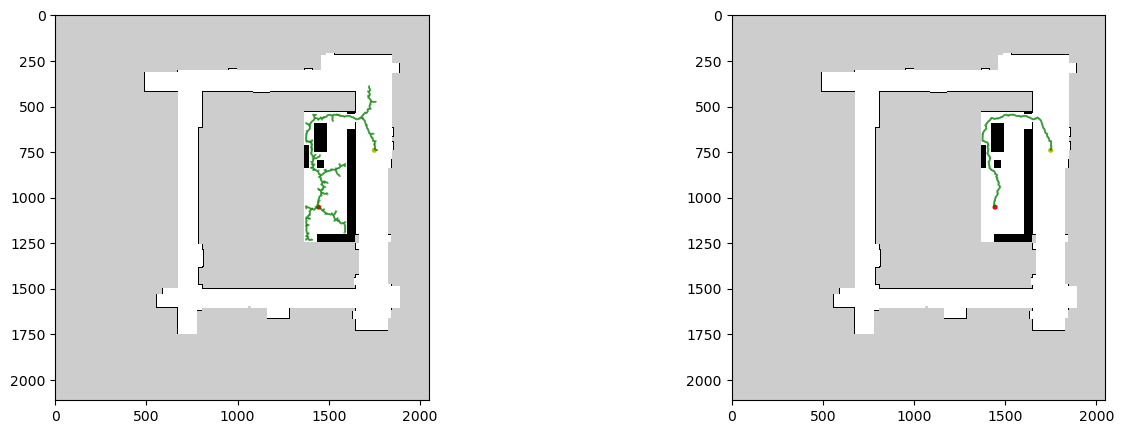

In [9]:
fig = plt.figure(figsize=(16,5))
ax = fig.add_subplot(1, 2, 1)
plt.imshow(image)
ax.add_artist(plt.Circle((start.x, start.y), 10, color='r'))
ax.add_artist(plt.Circle((end.x, end.y), 10, color='y'))
for i in range(len(rrtPlanner.nodeList)-1):
    pt = rrtPlanner.nodeList[i].pos.tuple()
    ax.add_artist(plt.Circle((pt[0], pt[1]), 1, color='g'))
ax2 = fig.add_subplot(1, 2, 2)
plt.imshow(image)
ax2.add_artist(plt.Circle((start.x, start.y), 10, color='r'))
ax2.add_artist(plt.Circle((end.x, end.y), 10, color='y'))
for i in range(len(rrtPlanner.finalPath)-1):
    pt = rrtPlanner.finalPath[i].tuple()
    ax2.add_artist(plt.Circle((pt[0], pt[1]), 1, color='g'))
plt.show()